# **1. Perkenalan Dataset**


Sumber Data set dari kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# **2. Import Library**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# **3. Memuat Dataset**

In [2]:
df= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **4. Exploratory Data Analysis (EDA)**



In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [7]:
df.sort_values('age', ascending=False).head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1042,39120,Female,82.0,0,0,No,Self-employed,Urban,82.21,26.0,never smoked,0
3108,53252,Male,82.0,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
35,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
1029,23031,Male,82.0,0,0,Yes,Self-employed,Rural,85.29,27.0,never smoked,0


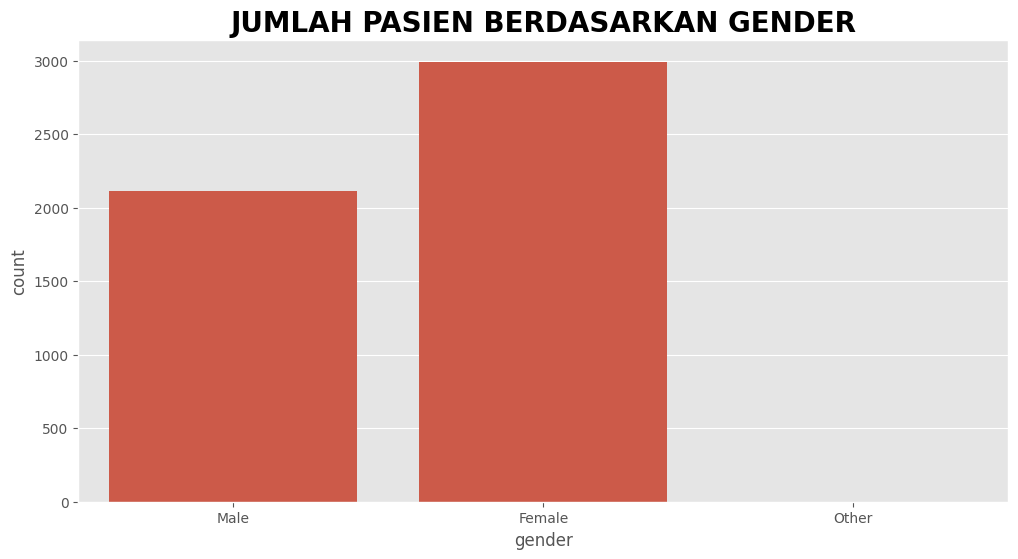

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.countplot(x=df['gender'])
plt.title("JUMLAH PASIEN BERDASARKAN GENDER", fontsize=20, fontweight='bold')
plt.show()

# **5. Data Preprocessing**

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [10]:
categorical_cols = ['gender', 'ever_married', 'Residence_type',
                    'work_type', 'smoking_status']

categorical_cols = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df.astype(int)


In [11]:
df = df.drop(columns=['id'])

In [12]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,1,0,1,0,0,1,0,0
1,61,0,0,202,28,1,0,0,1,0,0,0,1,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,0,0,1,1,0,1,0,0,0,0,1
4,79,1,0,174,24,1,0,0,1,0,0,0,1,0,0,1,0


In [13]:
import pandas as pd

# Misal df sudah selesai preprocessing
# df = ... (hasil preprocessing dari notebook sebelumnya)

# Nama file preprocessing
preprocessing_file = '/content/healthcare-dataset-stroke-data_preprocessing.csv'

# Simpan dataset preprocessing langsung di /content/
df.to_csv(preprocessing_file, index=False)

print(f"✅ File preprocessing berhasil disimpan di {preprocessing_file}")


✅ File preprocessing berhasil disimpan di /content/healthcare-dataset-stroke-data_preprocessing.csv
